# Markov Decision Process Example
- 2 states, s1 and s2
- 2 actions, a1 and a2

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
def debug(i, j, k, K, n, t, v):
    first = "i: {}\tj: {}\tn: {}\tT(k,j,n): {}\tV(k): {}".format(i, j, n, t, v)
    others = "T(k,j,n): {}\tV(k): {}".format(t, v)
    if(k == 0):
        print(first, end="")
    else:
        print(others, end="")
    if(k != K):
        print(" +\t", end="")
    else:
        print("")

def value_iteration(states, actions, T, rewards, gamma, beta, values=[], verbose=False):
    """
        @brief: implements Bellman's equation to assign the max expected state values
        
        @input:
            states: a list of states (length is j), type should be string if verbose=True i.e. ["s1", "s2", "living room" ... "etc"]
            actions: a list of actions (length is n), type should be string if verbose=True i.e. ["a1", "a2", "take picture" ... "etc"]
            T: a jxjxn matrix of transition probabilities P(Sj | Si, An) for all Sj, Si, and An, j=i is valid (self transitions)
            rewards: an array of length j specifying the reward for each state. The reward value never changes.
            gamma: the discount factor, i.e. how much do we care about future rewards
            beta: the stopping criteria, i.e. minimum amount of improvement between iterations before stopping
            values: [optional] current values of the states, set to the states reward value if not supplied
            verbose: [optional] set to false 
        
        @output:
            values: an array of state values where V(S(i)) = V[i]
            policy: a dictionary mapping states as keys to the best action as values, i.e. policy["some state"] -> "some action"
    """
    if(len(values) == 0):
        values = rewards[:]
    old_values = np.ones(len(rewards))*-999
    #stopping_criteria = .005
    policy = dict.fromkeys(states, "")
    i = 0
    while(abs(sum(values) - sum(old_values)) > beta):
        old_values = values[:]
        for j in range(0, len(states)): # all states in S
            vals = np.zeros(len(actions))
            for n in range(0, len(actions)): # valid actions in Sj
                assert vals[n] == 0
                for k in range(0, len(states)): # reachabe states from Sj
                    vals[n] = vals[n] + T[k][j][n]*values[k]
                    if(verbose):
                        debug(i, j, k, len(states)-1, n, T[k][j][n], values[k])
            values[j] = rewards[j] + gamma * np.amax(vals)
            policy[states[j]] = actions[np.argmax(vals)]
            if(verbose):
                print("Vals: {}".format(vals))
                print("V({0}) = R({0}) + gamma*max({1})".format(j, vals))
                print("V({0}) = {1} + {2}*{3}".format(j, rewards[j], gamma, np.amax(vals)))
                print("V(" + str(j) + "): " + str(values[j]))
        i = i + 1
    print("Stopping criteria met. state values have been permanently assigned.")
    print("V(s1) = {:.2f}\tV(s2) = {:.2f}".format(values[0], values[1]))
    print("R(s1) = {:.2f}\tR(s2) = {:.2f}".format(rewards[0], rewards[1]))
    print("Optimal policy: ")
    for key, value in policy.items():
        print("in state (" + key + ") take action (" + value+ ")")
    return values, policy

In [143]:
states = ["s1", "s2"]
actions = ["a1", "a2"]
rewards = [3, -1]

# initialize the values
# possible choices are random, zeros, or set to reward value
values = rewards[:]

# T is a jxjxn matrix of transition probabilities P(Sj | Si, An) for all Sj, Si, and An
# P(s1 | s1, a1) = 0.0
# P(s1 | s1, a2) = 0.5 
# .... 
# P(s2 | s2, a2) = 1.0
# This information must be given (or learned, but that is a different problem)
T = [[[0, .5], [1.0, 0]], [[1.0, .5], [0, 1.0]]]

# the weight factor for how much we care about future rewards
gamma = .5

# the stopping criteria, i.e. if improvement is less than this value then stop
beta = .005
values, policy = value_iteration(states, actions, T, rewards[:], gamma, beta, values=rewards[:], verbose=False)
print(values)
print(policy)

Stopping criteria met. state values have been permanently assigned.
V(s1) = 4.40	V(s2) = 1.20
R(s1) = 3.00	R(s2) = -1.00
Optimal policy: 
in state (s1) take action (a2)
in state (s2) take action (a1)
[4.399061441421509, 1.1995307207107544]
{'s1': 'a2', 's2': 'a1'}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'nRows': 3, 'nCols': 4, 'stateObstacles': [5], 'stateTerminals': [10, 11], 'nStates': 12, 'nActions': 4, 'rewards': array([-0.04, -0.04, -0.04, -0.04,  0.  , -0.04, -0.04, -0.04, -0.04,
        1.  , -1.  , -0.04]), 'states': ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12'], 'actions': ['up', 'down', 'left', 'right'], 'values': array([-0.04, -0.04, -0.04, -0.04,  0.  , -0.04, -0.04, -0.04, -0.04,
        1.  , -1.  , -0.04])}


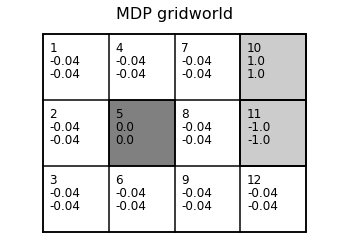

[-0.04 -0.04 -0.04 -0.04  0.   -0.04 -0.04 -0.04 -0.04  1.   -1.   -0.04]
[-0.04 -0.04 -0.04 -0.04  0.   -0.04 -0.04 -0.04 -0.04  1.   -1.   -0.04]


In [32]:
%load_ext autoreload
%autoreload 2
from World import World
world = World()
print(vars(world))
world.plot()
T = construct_T(world, p=.8, step=-.04)
print(world.rewards)

In [34]:
world.states

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12']

In [ ]:
def construct_T(world):
    T = np.zeros((self.nStates, self.nStates, self.nActions))
    

In [33]:
np.zeros((2,2,2))

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [28]:
def construct_p(world, p=0.8, step=-0.04):
    nstates = world.get_nstates()
    nrows = world.get_nrows()
    obsacle_index = world.get_stateobstacles()
    terminal_index = world.get_stateterminals()
    bad_index = obsacle_index + terminal_index
    rewards = np.array([step] * 4 + [0] + [step] * 4 + [1, -1] + [step])
    actions = ["N", "S", "E", "W"]
    transition_models = {}
    for action in actions:
        transition_model = np.zeros((nstates, nstates))
        for i in range(1, nstates + 1):
            if i not in bad_index:
                if action == "N":
                    if i + nrows <= nstates and (i + nrows) not in obsacle_index:
                        transition_model[i - 1][i + nrows - 1] += (1 - p) / 2
                    else:
                        transition_model[i - 1][i - 1] += (1 - p) / 2
                    if 0 < i - nrows <= nstates and (i - nrows) not in obsacle_index:
                        transition_model[i - 1][i - nrows - 1] += (1 - p) / 2
                    else:
                        transition_model[i - 1][i - 1] += (1 - p) / 2
                    if (i - 1) % nrows > 0 and (i - 1) not in obsacle_index:
                        transition_model[i - 1][i - 1 - 1] += p
                    else:
                        transition_model[i - 1][i - 1] += p
                if action == "S":
                    if i + nrows <= nstates and (i + nrows) not in obsacle_index:
                        transition_model[i - 1][i + nrows - 1] += (1 - p) / 2
                    else:
                        transition_model[i - 1][i - 1] += (1 - p) / 2
                    if 0 < i - nrows <= nstates and (i - nrows) not in obsacle_index:
                        transition_model[i - 1][i - nrows - 1] += (1 - p) / 2
                    else:
                        transition_model[i - 1][i - 1] += (1 - p) / 2
                    if 0 < i % nrows and (i + 1) not in obsacle_index and (i + 1) <= nstates:
                        transition_model[i - 1][i + 1 - 1] += p
                    else:
                        transition_model[i - 1][i - 1] += p
                if action == "E":
                    if i + nrows <= nstates and (i + nrows) not in obsacle_index:
                        transition_model[i - 1][i + nrows - 1] += p
                    else:
                        transition_model[i - 1][i - 1] += p
                    if 0 < i % nrows and (i + 1) not in obsacle_index and (i + 1) <= nstates:
                        transition_model[i - 1][i + 1 - 1] += (1 - p) / 2
                    else:
                        transition_model[i - 1][i - 1] += (1 - p) / 2
                    if (i - 1) % nrows > 0 and (i - 1) not in obsacle_index:
                        transition_model[i - 1][i - 1 - 1] += (1 - p) / 2
                    else:
                        transition_model[i - 1][i - 1] += (1 - p) / 2
                if action == "W":
                    if 0 < i - nrows <= nstates and (i - nrows) not in obsacle_index:
                        transition_model[i - 1][i - nrows - 1] += p
                    else:
                        transition_model[i - 1][i - 1] += p
                    if 0 < i % nrows and (i + 1) not in obsacle_index and (i + 1) <= nstates:
                        transition_model[i - 1][i + 1 - 1] += (1 - p) / 2
                    else:
                        transition_model[i - 1][i - 1] += (1 - p) / 2
                    if (i - 1) % nrows > 0 and (i - 1) not in obsacle_index:
                        transition_model[i - 1][i - 1 - 1] += (1 - p) / 2
                    else:
                        transition_model[i - 1][i - 1] += (1 - p) / 2
            elif i in terminal_index:
                transition_model[i - 1][i - 1] = 1
        transition_models[action] = pd.DataFrame(transition_model, index=range(1, nstates + 1), columns=range(1, nstates + 1))

    return transition_models, rewards